<center>
   <img src="logounam.png"width="150">
</center>


  <font size="6"><b> <center> Universidad Nacional Autónoma de México     </b> <br> </font>
  <font size="4"><b> <center> Posgrado en Ciencias de la Tierra </b><br> </font>
  <font size="3"> <center> 1D CNN implementation for Seismic Event detection in Paricutin Data </b> <br> </font>
  <font size="3"><b> <center>@Author: MSc. Kevin Axel Vargas-Zamudio </b> <br> </font>
  <font size="3"><b> <center>email: seismo.ai.kevvargas@gmail.com </b><br></font>

# Observed data for 2022 Paricutin Seismic Swarm
## 1D CNN development for Local Seismic Event Detection
### Convolutional Neural Network implementation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.io import loadmat,savemat

from os.path import dirname, join as pjoin
import sys
import copy as copy
import os
import time
import random

In [44]:
def retrieve_Xinput_Ytarget(years,months,day_30,day_31):
    # Retrieving .mat files from /res directory for a single day
    path = 'X_input_mat/'

    mat_fname = []
    
    for year in years[0:1]:
        for month in months[8:11]:
            if  month == '01' or month == '03' or month == '05' or month == '07' \
            or month == '08' or month == '10' or month == '12':
                days = copy.copy(day_31)
            elif month == '04' or month == '06' or month == '09' or month == '11':
                days = copy.copy(day_30)

            for day in days:#[15:]:##daysssss
#                 for i in range(1,24):
#                     #month_day = month + 
#                     if i <= 9:
#                         mat_fname.append(path + 'Xinput_'+ year + '_' + month + '_' + day +'_0' + str(i) + '.mat')
#                     else:
#                         mat_fname.append(path + 'Xinput_'+ year + '_' + month + '_' + day + '_' + str(i) + '.mat')
                        
                mat_fname.append(path + 'Xinput_'+ year + '_' + month + '_' + day + '.mat')
 

    # .mat file list for a complete day (each .mat data file for 1 of 24 hours)
    data = []
    #Xinput
    for i in range(len(mat_fname)):
        data.append(loadmat(mat_fname[i]))

    
    

    # Keys for data day dictionary
    data_day = list()
    for s in range(len(data[:])):
        data_day.append(data[s])
    #print(data_day[s])
    
    return data, data_day
        

In [45]:
def month_day_str():
    month = []
    day1 = [] ; day2 = []

    for i in range(1,13):
        if i <= 9:
            month.append('0'+str(i))
        else:
            month.append(str(i))
    for i in range(1,31):
        if i <= 9:
            day1.append('0'+str(i))
        else:
            day1.append(str(i))
    day2 = copy.copy(day1)
    day2.append('31')
    
    return month, day1, day2

In [279]:
# Reading X input and y target

#data = loadmat(path + 'Xinput_2022_09_03')
months , day_30, day_31 = month_day_str()
years = ['2022', '2023']

data,data_day = retrieve_Xinput_Ytarget(years,months,day_30,day_31)

Xinput = []
for i in range(len(data)):
    Xinput.append(data[i]['Xinput'])
    
sixes = [3,4,18,19,25,27,33,38,39,43,44,46,49,52,55,56,57,59,62,64,70,71,73,82,83,86]
twelves = [22,26,37,47,51,65,85,88,90]
eighteens = [21,50,80]

aux = 0
for i in range(len(data)):
    if i in sixes:
        aux += len(data[i]['Xinput'][:-6])
    elif i in twelves:
        aux += len(data[i]['Xinput'][:-12])
    elif i in eighteens:
        aux += len(data[i]['Xinput'][:-18])
    else:
        aux += len(data[i]['Xinput'])
    
print(aux)
Nsamp_win = len(data[0]['Xinput'][0])
Nlabels   = len(data[0]['Ytarget'][0])

X_input = np.zeros((aux,Nsamp_win))
Y_target = np.zeros((aux))


aux = 0
for i in range(len(data)): # 91 days
    if i in sixes:
        for j in range(len(data[i]['Xinput'][:-6])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    elif i in twelves:
        for j in range(len(data[i]['Xinput'][:-12])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    elif i in eighteens:
        for j in range(len(data[i]['Xinput'][:-18])):   # variable lenght, number of 'good' events per day
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1
    else:
        for j in range(len(data[i]['Xinput'])):
            X_input[aux,:] = data[i]['Xinput'][j]
            Y_target[aux]  = data[i]['Ytarget'][0][j]
            aux += 1


# print(Nsamp_win,Nlabels)

11772


In [280]:
# Removing some zeros
Xinput

[array([[0.01946092, 0.02206426, 0.01945933, ..., 0.01496593, 0.0125402 ,
         0.01093341],
        [0.01738773, 0.01429964, 0.00923532, ..., 0.01259157, 0.01411175,
         0.01567292],
        [0.01324882, 0.01747681, 0.01882222, ..., 0.01603565, 0.01803502,
         0.01694574],
        ...,
        [0.01073865, 0.01212636, 0.02004821, ..., 0.01407354, 0.0144494 ,
         0.02775056],
        [0.03093406, 0.03053946, 0.02781684, ..., 0.01597868, 0.01795419,
         0.02374545],
        [0.04097115, 0.04457637, 0.03806311, ..., 0.00893861, 0.01408098,
         0.01610281]]),
 array([[0.14958598, 0.11945994, 0.09374175, ..., 0.09037835, 0.07581861,
         0.08387299],
        [0.16123586, 0.16211569, 0.12789407, ..., 0.07220321, 0.07067872,
         0.08275998],
        [0.08741151, 0.06880894, 0.04706214, ..., 0.09583275, 0.06006217,
         0.04533458],
        ...,
        [0.0180735 , 0.02701214, 0.02758876, ..., 0.01739181, 0.01489935,
         0.01398873],
        [0.0

In [281]:
print(len(data[21]['Xinput'][455]))

400


In [282]:
print(len(data[21]['Xinput']))

456


In [283]:
print(len(data[21]['Xinput'][:-6]))

450


In [284]:

data[21]['Xinput'][438]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [285]:
X_input.shape

(11772, 400)

In [291]:
Y_target.shape

(11772,)

In [40]:
months[8:11]

['09', '10', '11']

In [293]:
# Selecting random sample from global input dataset

perc_train = 0.80
perc_test  = 0.20
Ninput = X_input.shape[0]
Nwin = X_input.shape[1]
Ntrain = int(Ninput * perc_train)
Ntest  = int(Ninput * perc_test )
print('Ntrain = ',Ntrain,'Ntest',Ntest)


Ntrain =  9417 Ntest 2354


In [294]:
random.seed(7)
Xtrain = random.sample(list(X_input),Ntrain)
Xtest = random.sample(list(X_input),Ntest)
print(np.shape(Xtrain),np.shape(Xtest))

(9417, 400) (2354, 400)


In [295]:
# Extracting random index vector
X_idx = np.arange(0,Ninput,1)
#X_index
random.seed(7)
train_idx = random.sample(list(X_idx),Ntrain)
len(train_idx)
#train_idx


9417

In [296]:
train_idx_sorted = sorted(train_idx)
np.asarray(train_idx_sorted)

array([    0,     1,     2, ..., 11769, 11770, 11771])

In [297]:
test_idx = np.delete(X_idx,train_idx_sorted)
# Excluding train samples from Total input samples = test samples
Xtest= np.delete(X_input,train_idx_sorted,axis=0)
test_idx

array([    5,     8,    12, ..., 11744, 11746, 11747])

In [299]:
# Target train and test vectors
ytrain = Y_target[train_idx_sorted]
ytest = Y_target[test_idx]
ytrain = ytrain.astype(int)
ytest = ytest.astype(int)

In [300]:
ytest

array([1, 2, 0, ..., 2, 2, 1])

In [301]:
np.shape(Xtest)

(2355, 400)

In [111]:
#np.reshape(Xtrain,(Ntrain,Nwin,1))

In [160]:
#tf.expand_dims(Xtrain, -1, name=None, dim=1)

In [303]:
tf.expand_dims(Xtrain, -1).shape.as_list()

NameError: name 'tf' is not defined

In [306]:
Xtrain = np.asarray(Xtrain)
Xtrain = Xtrain.reshape((Ntrain, Nwin, -1))
#Xtest  = np.reshape(Xtrain,(-1,1))
ytrain = np.reshape(ytrain,(-1,1))
ytest = np.reshape(ytest,(-1,1))
#type(Xtrain) ; type(ytrain)
np.shape(ytrain)
np.shape(Xtrain)
#np.expand_dims(Xtrain, axis=2)

(9417, 400, 1)

In [307]:
print(f'X,y train dataset shape: {np.shape(Xtrain)} , {np.shape(ytrain)}')
print(f'X,y test dataset shape:  {np.shape(Xtest)}  , {np.shape(ytest)}')

X,y train dataset shape: (9417, 400, 1) , (9417, 1)
X,y test dataset shape:  (2355, 400)  , (2355, 1)


# Neural Network Architecture, definition and parameters:
- Convolutional layers:
- Pooling layers:
- Dropout layers:
- Dense Layer
- Activation function: Sigmoid, tanh, ReLu, Linear
- Descent Gradient optimization method: ADAM
- Loss Function: Binary Crossentropy 

In [332]:
import tensorflow as tf
# 1D CNN architecture: Convolution, Dropout, Pooling, Dense
from tensorflow.keras.layers import Conv1D,Dense,Dropout,MaxPool1D,InputLayer,Flatten,GlobalAveragePooling1D
from tensorflow.keras import Input,optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [321]:
Xtrain[0].shape

(400, 1)

In [343]:
# 1D Convolutional Neural Network for seismic time series classification
#input_shape = tf.TensorShape(tf.expand_dims(Xtrain, -1).shape.as_list())
input_shape = tf.TensorShape(Xtrain[0].shape)
print(input_shape)

i = Input(shape=input_shape)
x = Conv1D(filters=10,kernel_size=3,activation='relu')(i) # ReLu for Classification
x = Conv1D(filters=10,kernel_size=3,activation='relu') (x)
x = MaxPool1D(pool_size = 3)(x)
x = Conv1D(filters=20,kernel_size=3,activation='relu')(x) # ReLu for Classification
x = Conv1D(filters=20,kernel_size=3,activation='relu') (x)
x = GlobalAveragePooling1D()(x)
x = Dropout(rate = 0.5)(x)
x = Flatten()(x)
x = Dense(100,activation = 'relu')(x)
x = Dense(3,activation='softmax')(x)

model = Model(i,x)
model_name = 'CNN 1D:   '
model.summary()

(400, 1)
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 400, 1)]          0         
                                                                 
 conv1d_37 (Conv1D)          (None, 398, 10)           40        
                                                                 
 conv1d_38 (Conv1D)          (None, 396, 10)           310       
                                                                 
 max_pooling1d_14 (MaxPoolin  (None, 132, 10)          0         
 g1D)                                                            
                                                                 
 conv1d_39 (Conv1D)          (None, 130, 20)           620       
                                                                 
 conv1d_40 (Conv1D)          (None, 128, 20)           1220      
                                                 

In [342]:
# Stablish the model compile parameters
#model.compile(loss='binary_crossentropy',optimizer=optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0 ),metrics = 'accuracy')
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = 'accuracy')
#opt = SGD(lr=0.01, momentum=0.9)
#model.compile(loss='binary_crossentropy',optimizer='sgd',metrics = 'accuracy')

# Training the convolutional neural network
np.shape(Xtrain)
CNN1 = model.fit(Xtrain,ytrain,validation_data=(Xtest,ytest),epochs=100)#,batch_size=2)

Epoch 1/100
295/295 [==============================] - 5s 9ms/step - loss: 0.0000e+00 - accuracy: 0.3320 - val_loss: 0.0000e+00 - val_accuracy: 0.3389
Epoch 2/100
295/295 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3320 - val_loss: 0.0000e+00 - val_accuracy: 0.3389
Epoch 3/100
295/295 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3320 - val_loss: 0.0000e+00 - val_accuracy: 0.3389
Epoch 4/100
295/295 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3320 - val_loss: 0.0000e+00 - val_accuracy: 0.3389
Epoch 5/100
295/295 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accuracy: 0.3320 - val_loss: 0.0000e+00 - val_accuracy: 0.3389
Epoch 6/100
295/295 [==============================] - 2s 8ms/step - loss: 0.0000e+00 - accuracy: 0.3320 - val_loss: 0.0000e+00 - val_accuracy: 0.3389
Epoch 7/100
295/295 [==============================] - 2s 7ms/step - loss: 0.0000e+00 - accura

NameError: name 'files' is not defined

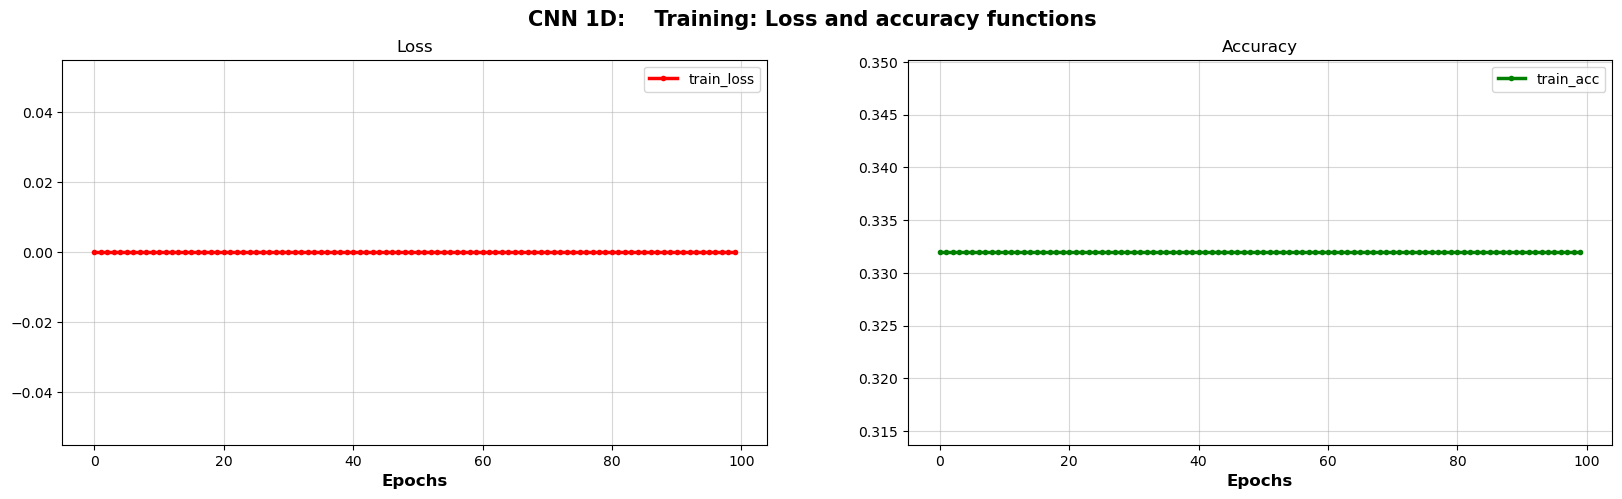

In [329]:
fig = plt.figure(figsize=(20,5))
plt.suptitle(f'{model_name} Training: Loss and accuracy functions',fontsize=15,weight='bold')
ax1 = plt.subplot(121)
ax1.title.set_text('Loss')
ax1.plot(CNN1.history['loss'],color='red',linewidth=2.5,marker = '.',label='train_loss')
#ax1.plot(CNN1.history['val_loss'],label='test_loss')
ax1.set_xlabel('Epochs',fontsize=12,weight='bold')
ax1.legend()
ax1.grid(alpha=0.5)
ax2 = plt.subplot(122)
ax2.title.set_text('Accuracy')
ax2.plot(CNN1.history['accuracy'],color='green',linewidth=2.5,marker='.',label='train_acc')
#ax2.plot(CNN1.history['val_accuracy'],label='test_acc')
ax2.set_xlabel('Epochs',fontsize=12,weight='bold')
ax2.legend()
ax2.grid(alpha=0.5)
fig.savefig('\content\drive\SeismoAI\Loss_Accuracy_Adam.png',bbox_inches='tight',pad_inches=0,dpi=500)
files.download("\content\drive\SeismoAI\Loss_Accuracy_Adam.png") 